# random asset exchange model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

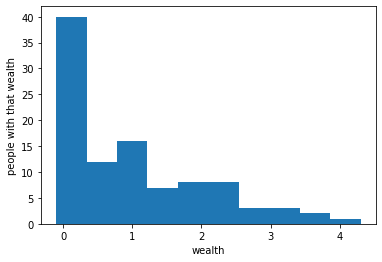

In [2]:
#basic plot
nsteps = 10000
npeople = 100
wealth = np.ones(npeople)
coin = 0.1

for t in range(nsteps):
    p1 = np.random.randint(low = 0, high = npeople)
    p2 = np.random.randint(low = 0, high = npeople)
    if(wealth[p1])>0:
        wealth[p1] -= coin
        wealth[p2] += coin
        
plt.hist(wealth);
plt.xlabel("wealth");
plt.ylabel("people with that wealth");

In [3]:
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

Add taxation, with the "strength" of this taxation encoded as one value. We want an easy way to change it; something like "effective tax rate". I recommend that you implement the Universal Basic Income system, and proportional taxation (because progressive taxation is harder), but you are welcome to code your model if you want to. Just don't make it too complicated, and make sure it all boils down to one "knob" of "more taxes" / "less taxes".

Play with different taxation strengths. Look at the evolution of Gini index, and at curves for poorest and riches people. Make sure that it all makes sense.

Make sure that with knob at 0, you get the same results as with "no taxes".

Once everything seems to be working, go meta (as we did for predator-prey), and put your model into an outer loop. Go through various levels of tax rate; for each value look at the final (only final, not intermediate) Gini index value. Plot "Final equality as a function of tax rate" plot.

In [24]:
#history
nsteps = 100
npeople = 100
trade_per_step = 10
interest = 0.001
coin = 0.1

wealth = np.ones(shape=(nsteps, npeople))
gini_history = np.zeros(nsteps)

for tax_rate in range(0.01, 1.1, 0.1):
    for t in range(1, nsteps):
        tax_hold = 0         #tax should reset at every time step but not for every person
        tax_hold = tax_hold + (wealth[t,:] *(tax_rate))
        universal_income = tax_hold/npeople
        wealth[t,:] = (wealth[t-1,:] *(1+interest)) - (wealth[t,:] *(tax_rate)) + universal_income
        for i in range(trade_per_step):
            p1 = np.random.randint(low = 0, high = npeople)
            p2 = np.random.randint(low = 0, high = npeople)
            if(wealth[t,p1])>0:
                wealth[t,p1] = wealth[t-1,p1] - coin 
                wealth[t,p2] = wealth[t-1,p2] + coin
        gini_history[t] = gini(wealth[t,:]) 
    
#print(wealth)
    
plt.figure(figsize=(15,3));
plt.subplot(1,3,1);
plt.hist(wealth[:,0]);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
#plt.plot(wealth[-1,:]);
poor_one = np.argmin(wealth[-1,:]);
rich_one = np.argmax(wealth[-1,:]);
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Timestep');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');


TypeError: 'float' object cannot be interpreted as an integer